In [4]:
import numpy as np
import json
import codecs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from model import my_aggclustering3

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
msdat_dir = '/home/hpms/Microsoft.IoT-Dump1.json'
with codecs.open(msdat_dir, 'r', 'utf-8-sig') as f:
    msdat = json.load(f)
msdat = pd.DataFrame(msdat)
msdat['Commands'] = [tuple(session) for session in msdat['Commands']]
msdat = msdat.drop_duplicates(subset='Commands').reset_index(drop=True)  # drop duplicates
msdat['Commands'] = [list(session) for session in msdat['Commands']]
msdat['Commands Length'] = [len(session) for session in msdat['Commands']]
msdat = msdat.sort_values(by='FirstSeen').reset_index(drop=True)

In [3]:
alpha_cluster = 0.1
cluster_threshold = -0.2
alpha_label = 0.1
seq_len = 12

In [4]:
my_agg = my_aggclustering3(msdat, alpha_cluster, cluster_threshold, alpha_label, seq_len)
for depth in range(6):
    my_agg.fit()
with open('agg3_data/aggclustering_1000.pkl', 'wb') as f:
    pickle.dump(my_agg, f, protocol=4)

Depth 1: 16 clusters exist. Time spent 58.89s.
Depth 2: 48 clusters exist. Time spent 706.52s.
Depth 3: 61 clusters exist. Time spent 1114.76s.
Depth 4: 63 clusters exist. Time spent 1289.77s.
Depth 5: 72 clusters exist. Time spent 1251.33s.
Depth 6: 84 clusters exist. Time spent 1893.68s.


In [38]:
with open('agg3_data/aggclustering_1000.pkl', 'rb') as f:
    my_agg = pickle.load(f)
for depth in range(2):
    my_agg.fit()
with open('agg3_data/aggclustering_1000.pkl', 'wb') as f:
    pickle.dump(my_agg, f, protocol=4)

Depth 7: 96 clusters exist. Time spent 2244.68s.
Depth 8: 100 clusters exist. Time spent 2648.35s.


In [5]:
with open('agg3_data/aggclustering_1000.pkl', 'rb') as f:
    my_agg = pickle.load(f)
max_depth = my_agg.depth
init_commands_clusters = my_agg.init_commands_clusters
posteriors = my_agg.posteriors
expected_predictive_probs = my_agg.expected_predictive_probs
weights = my_agg.weights

In [6]:
sorted_ws = []
xs = []
ys = []

for depth in range(max_depth):
    sorted_ws.append(sorted(weights[depth], reverse=True))
    xs.append([x for _, x in sorted(zip(weights[depth], init_commands_clusters[depth]), reverse=True)])
    ys.append([x for _, x in sorted(zip(weights[depth], expected_predictive_probs[depth]), reverse=True)])

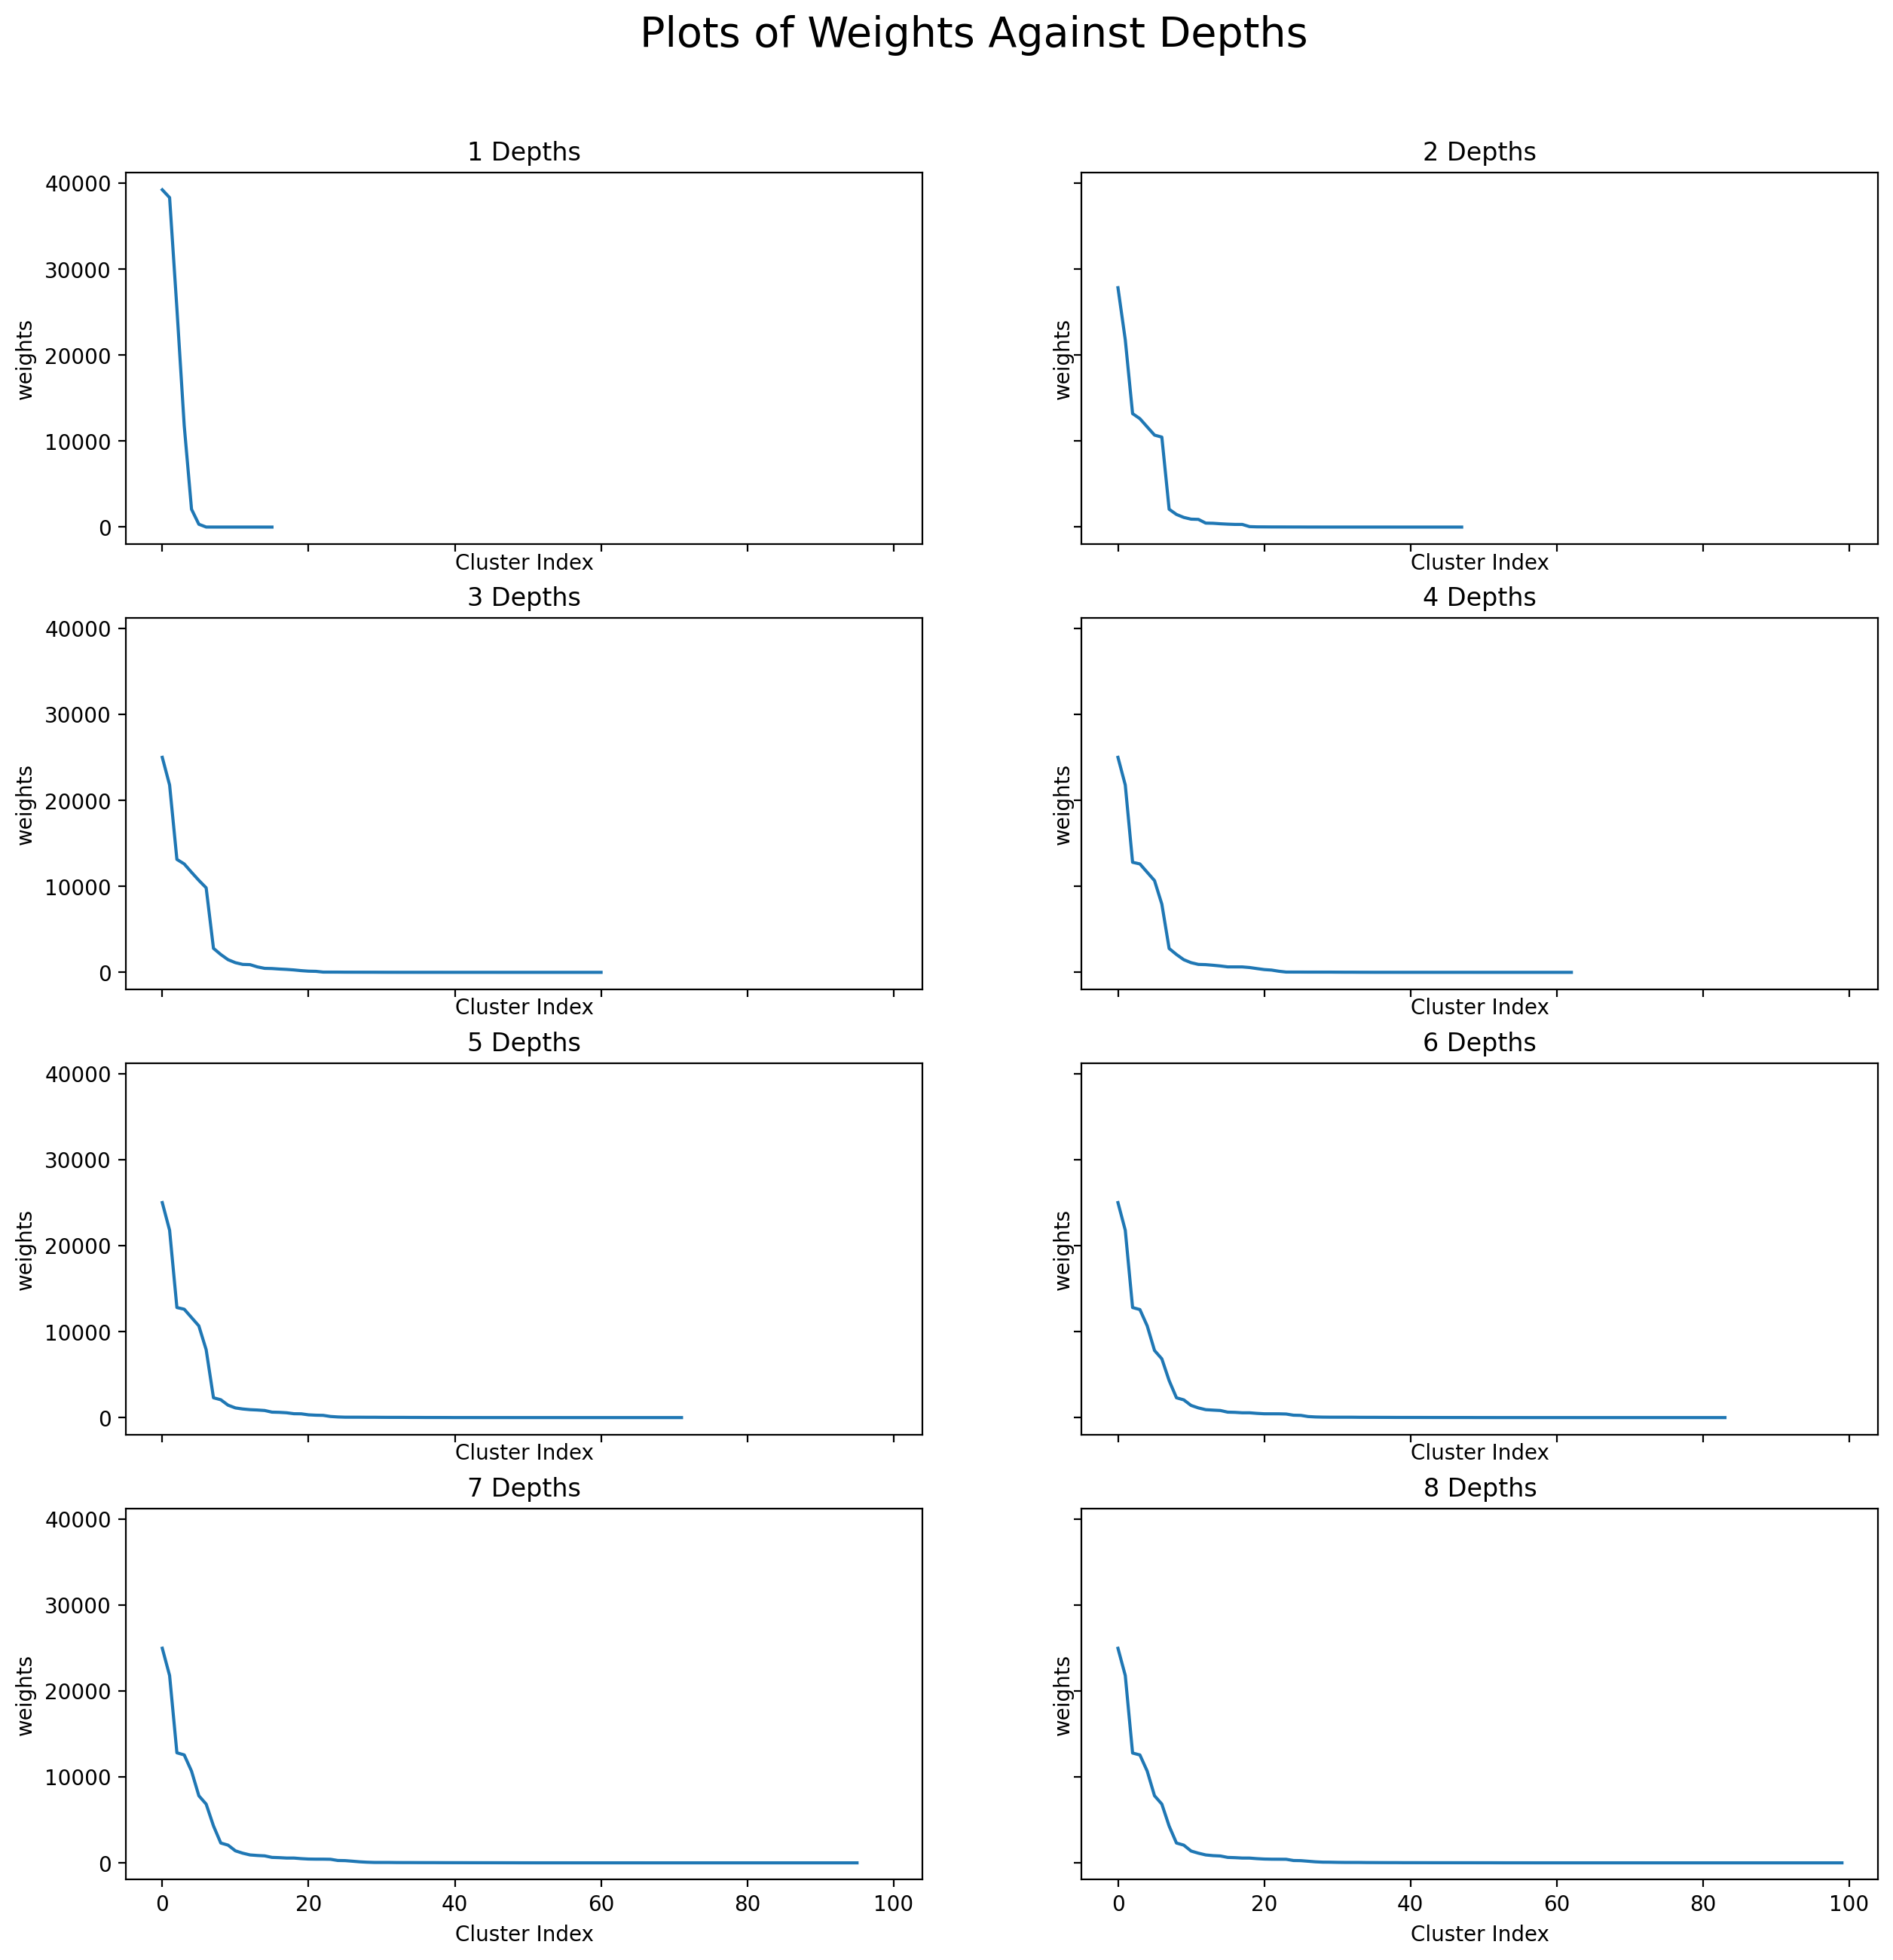

In [41]:
fig, ax = plt.subplots((max_depth+1)//2, 2, figsize=(15,15), dpi=200, sharex=True, sharey=True)
for depth in range(max_depth):
    sns.lineplot(x = [i for i in range(len(sorted_ws[depth]))], y = sorted_ws[depth],ax=ax[depth//2, depth%2])
    ax[depth//2, depth%2].set(title='{} Depths'.format(depth+1),
                              xlabel='Cluster Index',
                              ylabel='weights'
                             )
    fig.suptitle('Plots of Weights Against Depths',\
                 y = 0.95, fontsize=20
                )
plt.show()

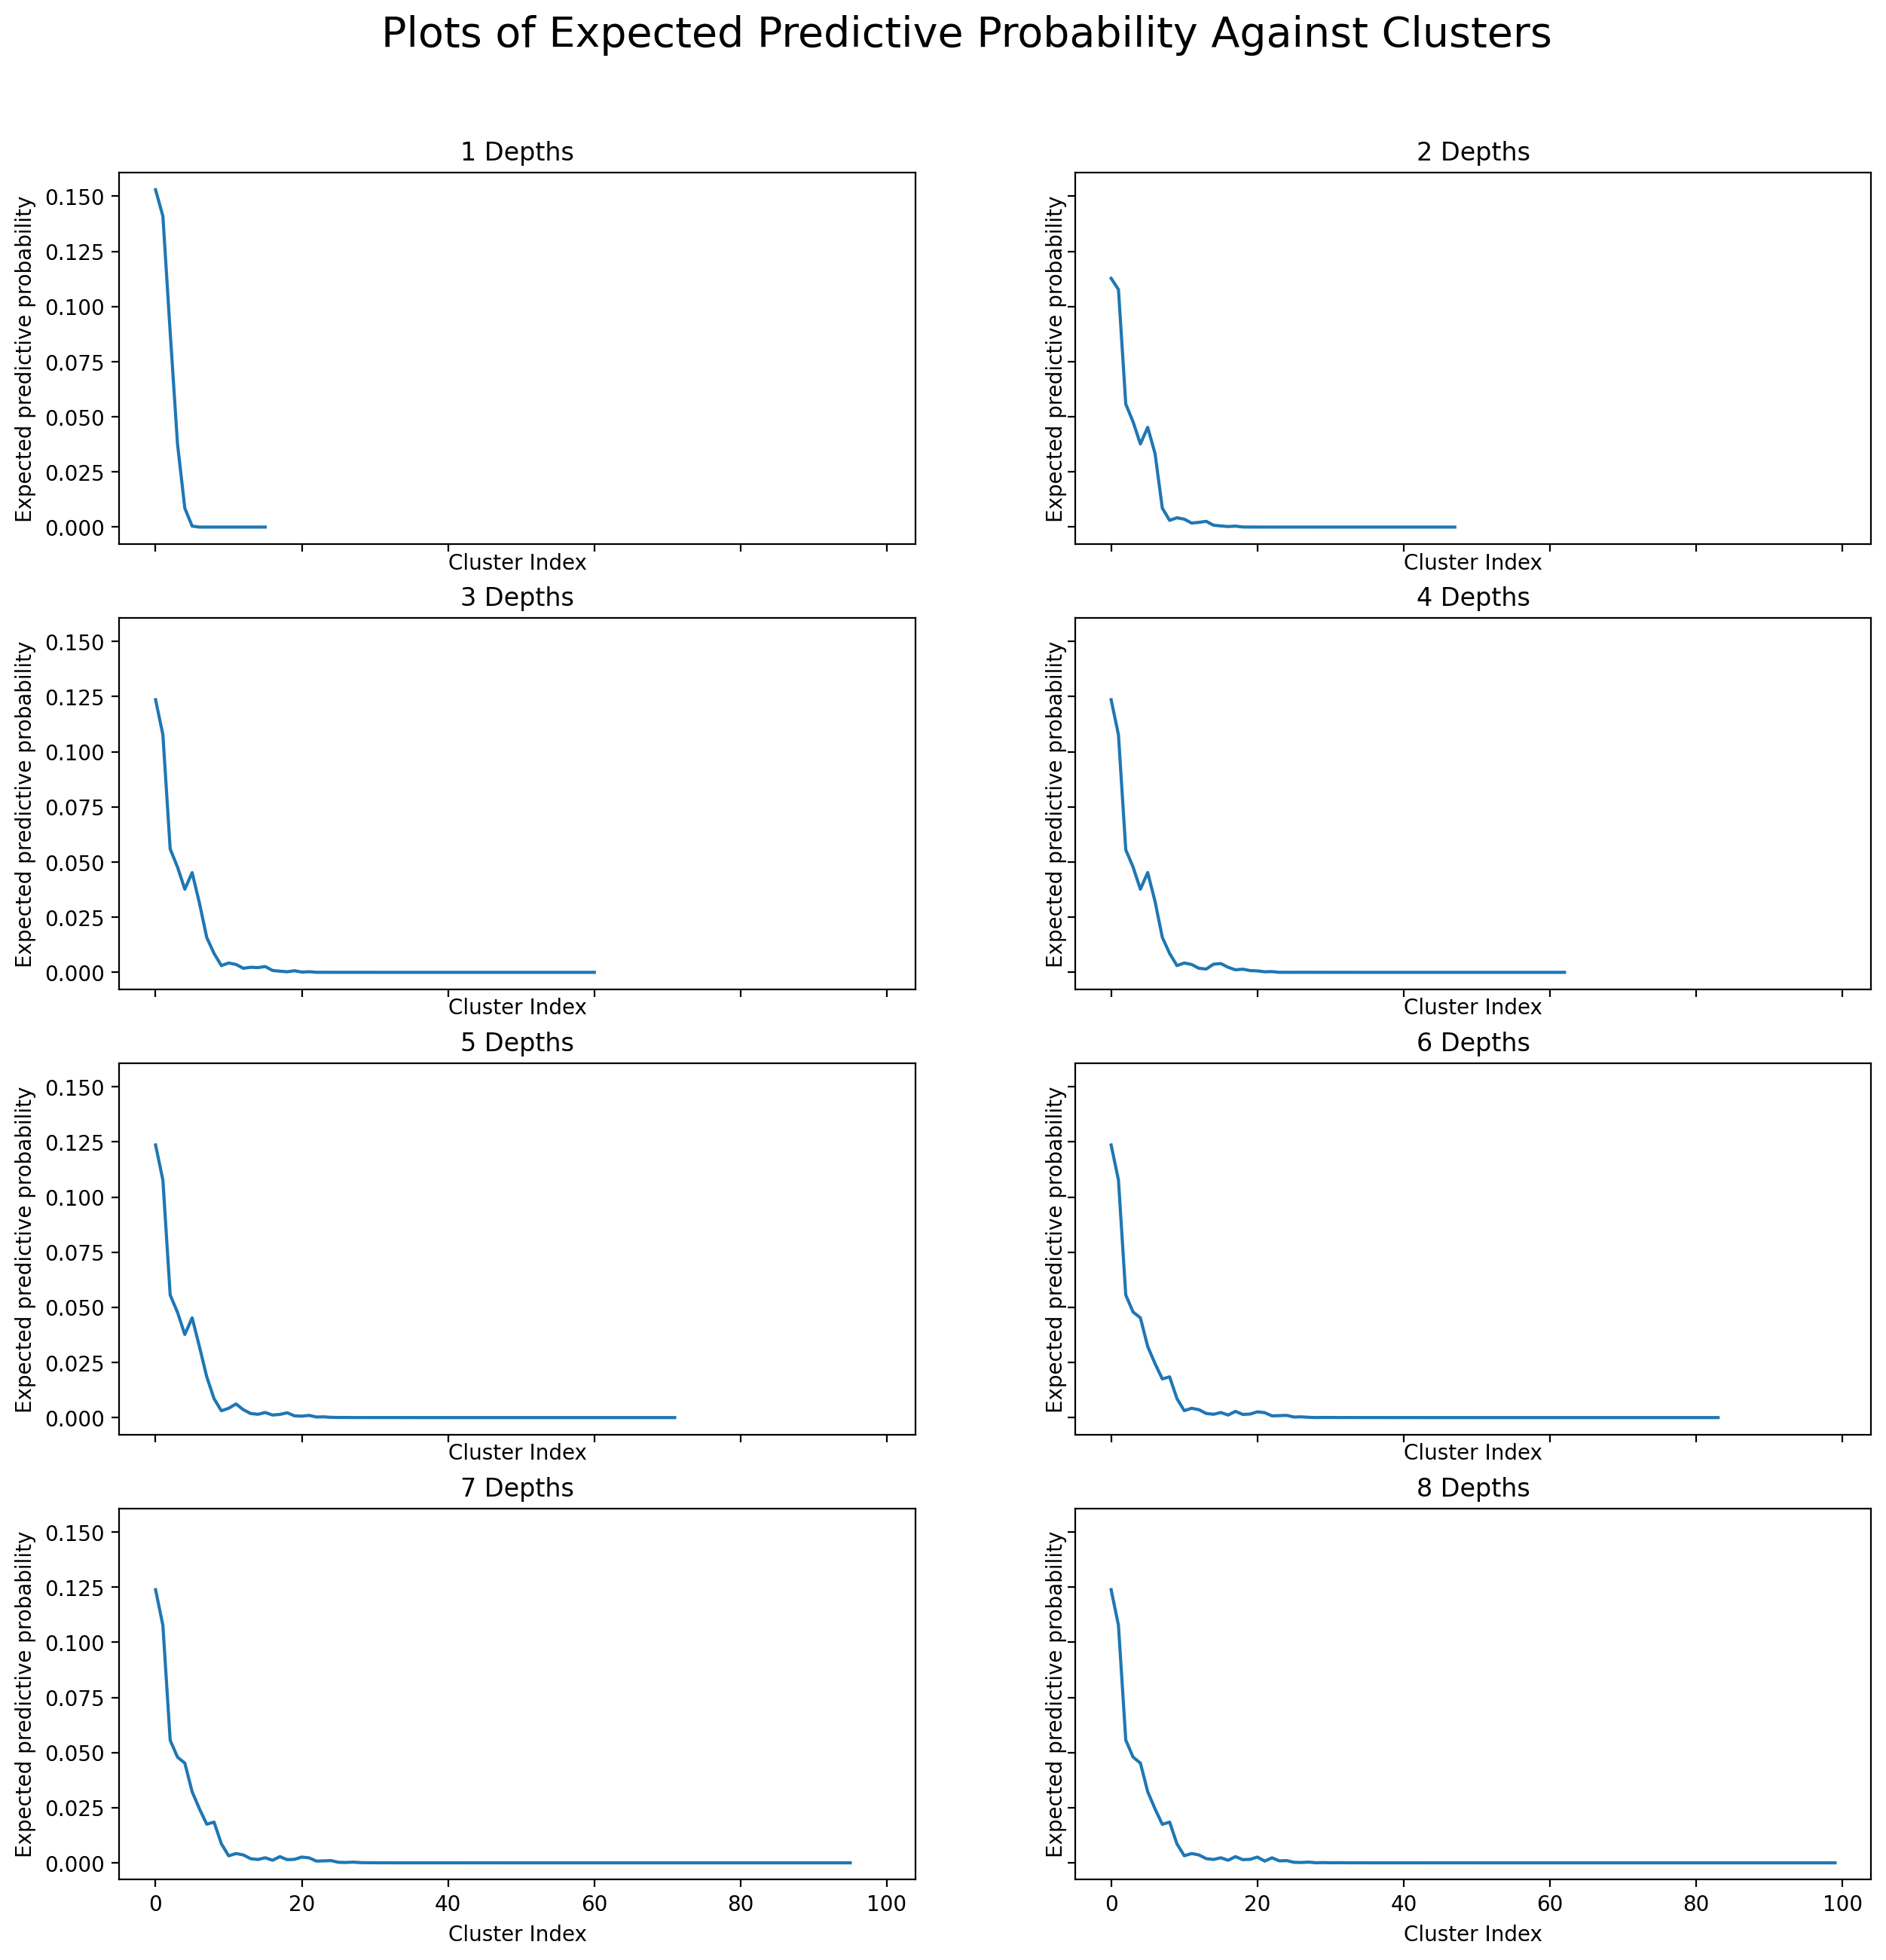

In [43]:
fig, ax = plt.subplots((max_depth+1)//2, 2, figsize=(15,15), dpi=200, sharex=True, sharey=True)
for depth in range(max_depth):
    sns.lineplot(x = [i for i in range(len(ys[depth]))], y = ys[depth],ax=ax[depth//2, depth%2])
    ax[depth//2, depth%2].set(title='{} Depths'.format(depth+1),
                              xlabel='Cluster Index',
                              ylabel='Expected predictive probability'
                             )
    fig.suptitle('Plots of Expected Predictive Probability Against Clusters',\
                 y = 0.95, fontsize=20
                )
plt.show()b

In [10]:
[np.sum(y) for y in ys]

[0.4288895715008912,
 0.4684991334547954,
 0.4961289406937667,
 0.5029905269734231,
 0.507636729466453,
 0.5134987906149898,
 0.5140118742041515,
 0.514336154733857]

In [50]:
for k in range(len(ys[-1])):
    print(ys[-1][k]/sorted_ws[-1][k] * np.sum(sorted_ws[-1]))

0.5818569149763826
0.5794229114808902
0.5110832670382661
0.4478361245217355
0.49705545014904173
0.48438847937032387
0.4200550459649001
0.4789745467311286
0.9388931440840165
0.4906965465353835
0.27355754742607835
0.43999962417184013
0.45607969151111416
0.2665371841780911
0.2245013582503909
0.4252079005197747
0.2282721634224205
0.5899958599098404
0.30484902021493954
0.38208429621601714
0.6925829188126923
0.2185007116250978
0.6372233657997477
0.2518230251188661
0.438747819467045
0.1157057148305975
0.09762258095414288
0.32588827734823933
0.054231733643062476
0.18128640879052027
0.07323037025579576
0.13047361541902092
0.1287221024415826
0.0415707751062704
0.10239148868398558
0.04765910065668015
0.07431756080404725
0.06649235581532928
0.06649235581532927
0.04405720841952209
0.04405720841952206
0.04052979555381281
0.03708112214659472
0.03045269407137338
0.02729086909943706
0.015108036564388257
0.024243746620390003
0.013830446961089116
0.009113472373096041
0.01853759157632745
0.010955399925208

In [9]:
sorted_ws[4][10]

1124

In [16]:
xs[4][0]

(('enable',
  'system',
  'hostname SEFA_ID:4388',
  '/bin/busybox SEFA',
  '/bin/busybox ps; /bin/busybox SEFA'),
 ('enable',
  'system',
  'hostname SEFA_ID:6575',
  '/bin/busybox SEFA',
  '/bin/busybox ps; /bin/busybox SEFA'),
 ('enable',
  'system',
  'hostname SEFA_ID:2775',
  '/bin/busybox SEFA',
  '/bin/busybox ps; /bin/busybox SEFA'),
 ('enable',
  'system',
  'hostname SEFA_ID:7857',
  '/bin/busybox SEFA',
  '/bin/busybox ps; /bin/busybox SEFA'),
 ('enable',
  'system',
  'hostname SEFA_ID:7174',
  '/bin/busybox SEFA',
  '/bin/busybox ps; /bin/busybox SEFA'),
 ('enable',
  'system',
  'hostname SEFA_ID:1806',
  '/bin/busybox SEFA',
  '/bin/busybox ps; /bin/busybox SEFA'),
 ('enable',
  'system',
  'hostname SEFA_ID:5488',
  '/bin/busybox SEFA',
  '/bin/busybox ps; /bin/busybox SEFA'),
 ('enable',
  'system',
  'hostname SEFA_ID:1085',
  '/bin/busybox SEFA',
  '/bin/busybox ps; /bin/busybox SEFA'),
 ('enable',
  'system',
  'hostname SEFA_ID:6482',
  '/bin/busybox SEFA',
  '/bi

In [54]:
msdat[len(msdat)//10*9:len(msdat)//10*9+10]

Protocol                                           Commands  \
112392   Telnet  [enable, shell, sh, linuxshell, bah, hostname ...   
112393   Telnet  [sh, linuxshell, bah, hostname Ex0_1565, /bin/...   
112394   Telnet  [sh, linuxshell, bah, hostname Ex0_6534, /bin/...   
112395   Telnet  [sh, linuxshell, bah, hostname Ex0_3237, /bin/...   
112396   Telnet  [sh, linuxshell, bah, hostname Ex0_2780, /bin/...   
112397   Telnet  [sh, linuxshell, bah, hostname Ex0_2431, /bin/...   
112398   Telnet  [sh, linuxshell, bah, hostname Ex0_2562, /bin/...   
112399   Telnet  [enable, shell, sh, linuxshell, bah, hostname ...   
112400   Telnet  [enable, shell, sh, linuxshell, bah, hostname ...   
112401   Telnet  [enable, shell, sh, linuxshell, bah, hostname ...   

                                                       ID  TimesSeen  \
112392  f4feb3f80be9a99abca77d31e111643407e26473947d4b...          7   
112393  8f23d6d9ee872e6ed3018670edb4f1284770431624d239...         15   
112394  544f4bcc7ac038ae9dc9892aada48c2b267f6b9ffe4dbb...         18   
112395  a3b2209b1e1cabe9c1ec5d227b0905c30d7fc78f4996a9...         11   
112396  9cf1fa25ebb1f505349d4b7569df612399afecffec97fc...          5   
112397  6ca5ae8b09f824badc07bc468c7c6b4ecba142c4cd79f1...         18   
112398  b27db93c2c04f9b9dfe8ca97393ebdaff05b62dd25a180...         10   
112399  a0c7001ae335c08328b843b231235b54c3bde05e6aa6f9...          2   
112400  db172b18f760f039512600bacadff716295ee0e34430b8...          5   
112401  440e335f754d4bf7e3e9daf7b7938af43bed2d56c3afc7...          6   

                      FirstSeen                 LastSeen  Commands Length  
112392  2019-10-13T11:01:03.128  2019-10-31T09:37:07.653               76  
112393  2019-10-13T11:01:42.536  2019-10-30T08:24:20.356               74  
112394   2019-10-13T11:02:28.28  2019-11-05T08:01:06.086               74  
112395   2019-10-13T11:02:59.64  2019-10-17T18:54:25.202               78  
112396  2019-10-13T11:03:06.584  2019-10-17T18:41:27.943               78  
112397  2019-10-13T11:03:26.057  2019-10-23T22:46:38.416               78  
112398  2019-10-13T11:03:38.234   2019-10-31T09:25:57.06               74  
112399  2019-10-13T11:03:38.259  2019-10-24T16:01:22.085               80  
112400  2019-10-13T11:03:45.135  2019-10-25T05:43:10.246               80  
112401  2019-10-13T11:03:53.181  2019-10-25T06:08:38.258               80

In [8]:
posteriors

[[array([1.3281e+03, 1.0000e-01, 1.0000e-01, 1.1000e+00, 1.0000e-01,
         1.0000e-01, 1.1000e+00, 6.1000e+00, 1.0000e-01, 1.0000e-01,
         1.1000e+00, 1.0000e-01, 1.0000e-01, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 1.0000e-01, 1.0000e-01, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 6.8010e+02, 1.0000e-01, 1.0000e-01, 1.1000e+00,
         1.0000e-01, 1.0000e-01, 1.0000e-01, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 1.0000e-01, 1.0000e-01, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 1.0000e-01, 1.0000e-01, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 1.0000e-01, 1.0000e-01, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 1.0000e-01, 1.0000e-01, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 1.0000e-01, 1.0000e-01, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 1.0000e-01, 1.0000e-01, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 1.0000e-01, 1.0000e-01, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 1.0000e-01, 1.0000e-01, 1.0000e-01, 1.0000e-01,
         1.0000e-01, 1.0000e-01, 1